# Modelling

In [1]:
#importation
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFECV

In [2]:
# defining dataframe
df=pd.read_csv("heart_2020_clean.csv")

df.head()

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5.0,1,0,1
1,1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7.0,0,0,0
2,2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8.0,1,0,0
3,3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6.0,0,0,1
4,4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8.0,0,0,0


In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.shape

(288496, 18)

## Descriptive Statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288496 entries, 0 to 288495
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      288496 non-null  int64  
 1   BMI               288496 non-null  float64
 2   Smoking           288496 non-null  int64  
 3   AlcoholDrinking   288496 non-null  int64  
 4   Stroke            288496 non-null  int64  
 5   PhysicalHealth    288496 non-null  int64  
 6   MentalHealth      288496 non-null  int64  
 7   DiffWalking       288496 non-null  int64  
 8   Sex               288496 non-null  int64  
 9   AgeCategory       288496 non-null  int64  
 10  Race              288496 non-null  int64  
 11  Diabetic          288496 non-null  int64  
 12  PhysicalActivity  288496 non-null  int64  
 13  GenHealth         288496 non-null  int64  
 14  SleepTime         288496 non-null  float64
 15  Asthma            288496 non-null  int64  
 16  KidneyDisease     28

In [6]:
df.isna().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

In [7]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,288496.000000,288496.000000,288496.000000,288496.000000,288496.000000,288496.000000,288496.000000,288496.000000,288496.000000,288496.000000,288496.000000,288496.000000,288496.000000,288496.000000,288496.000000,288496.000000,288496.000000,288496.000000
mean,0.088486,27.819583,0.420914,0.072639,0.038839,3.376061,3.981930,0.136234,0.474527,6.521591,4.375177,0.302798,0.772891,2.226915,7.052340,0.137056,0.037564,0.098528
std,0.284002,5.381108,0.493707,0.259543,0.193212,7.902890,7.970503,0.343038,0.499352,3.596015,1.229172,0.719126,0.418964,1.523922,1.254272,0.343907,0.190139,0.298028
min,0.000000,12.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,23.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.190000,1.000000,0.000000,0.000000,2.000000,4.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,43.080000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,11.000000,1.000000,1.000000,1.000000


In [8]:
df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.049502,0.104272,-0.037259,0.190361,0.160719,0.015924,0.192137,0.075655,0.239810,0.044072,0.160593,-0.089736,-0.011683,-0.000050,0.032198,0.138399,0.092012
BMI,0.049502,1.000000,0.019676,-0.039570,0.016668,0.067872,0.025910,0.134160,0.060215,0.021321,-0.020301,0.187703,-0.117964,0.048080,-0.055475,0.065347,0.042364,-0.028019
Smoking,0.104272,0.019676,1.000000,0.110188,0.058419,0.108979,0.076981,0.114242,0.088723,0.130046,0.076611,0.045502,-0.089498,0.015495,-0.042401,0.014761,0.031739,0.030567
AlcoholDrinking,-0.037259,-0.039570,0.110188,1.000000,-0.022736,-0.022051,0.046604,-0.038813,0.004435,-0.060665,0.044176,-0.062223,0.022578,0.001444,-0.002309,-0.005636,-0.031199,-0.009579
Stroke,0.190361,0.016668,0.058419,-0.022736,1.000000,0.128866,0.038578,0.169367,-0.000398,0.141548,0.002513,0.095502,-0.074304,-0.009319,0.000680,0.033349,0.087286,0.046351
PhysicalHealth,0.160719,0.067872,0.108979,-0.022051,0.128866,1.000000,0.267142,0.410244,-0.035112,0.114209,0.010368,0.131299,-0.212530,-0.036707,-0.095702,0.100813,0.131277,0.036915
MentalHealth,0.015924,0.025910,0.076981,0.046604,0.038578,0.267142,1.000000,0.130609,-0.097063,-0.159085,-0.002982,0.014413,-0.074385,-0.002725,-0.154360,0.098506,0.027268,-0.040174
DiffWalking,0.192137,0.134160,0.114242,-0.038813,0.169367,0.410244,0.130609,1.000000,-0.061097,0.250793,-0.003589,0.184818,-0.258472,-0.042625,-0.051915,0.083835,0.142511,0.063658
Sex,0.075655,0.060215,0.088723,0.004435,-0.000398,-0.035112,-0.097063,-0.061097,1.000000,-0.063318,0.014049,-0.007227,0.039863,-0.012697,-0.015968,-0.062991,-0.005346,0.014105
AgeCategory,0.239810,0.021321,0.130046,-0.060665,0.141548,0.114209,-0.159085,0.250793,-0.063318,1.000000,0.167282,0.200180,-0.124812,0.037493,0.107530,-0.058004,0.125981,0.269211


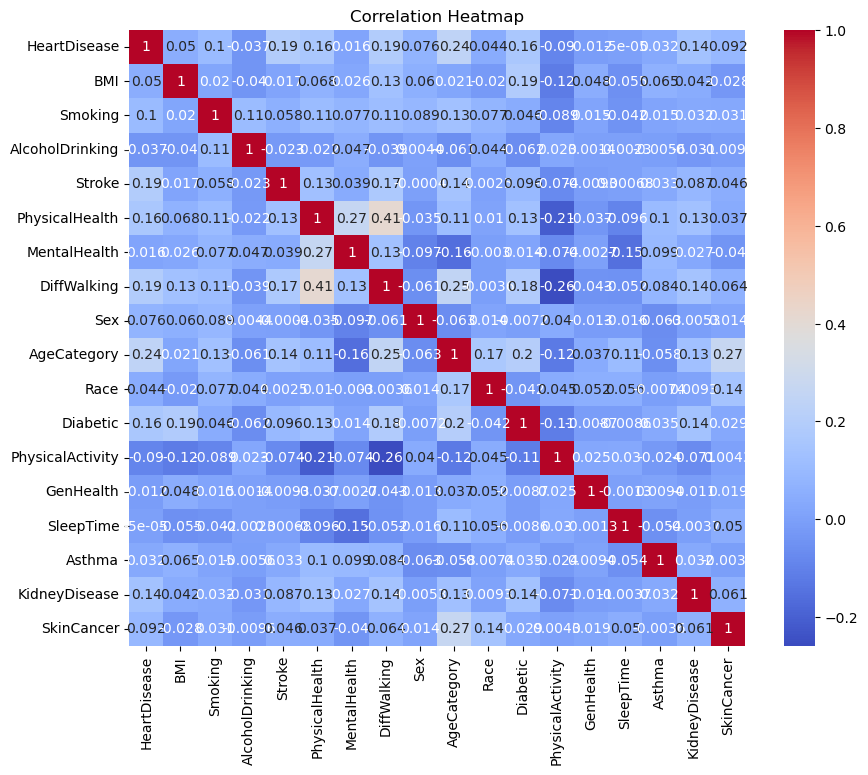

In [9]:
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title and display the heatmap
plt.title('Correlation Heatmap')
plt.show()

In [10]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288491,0,23.38,0,0,0,0,0,0,0,8,3,0,1,0,6.0,0,0,0
288492,0,22.22,0,0,0,0,0,0,0,0,3,0,1,0,8.0,0,0,0
288493,1,27.41,1,0,0,7,0,1,1,8,3,2,0,1,6.0,1,0,0
288494,0,29.84,1,0,0,0,0,0,1,3,3,0,1,4,5.0,1,0,0


# Unbalanced data Modelling

In [11]:
X_u = df.drop('SkinCancer', axis=1)
y_u = df['SkinCancer']

In [12]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_u, y_u, test_size=0.2, random_state=42)

In [13]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_u, y_train_u)

# Make predictions on the test set
y_pred_u = rf_model.predict(X_test_u)

# Evaluate the model
rf_accuracy = accuracy_score(y_test_u, y_pred_u)
print("Random Forest Accuracy:", rf_accuracy)
print("Classification Report:\n", classification_report(y_test_u, y_pred_u))

Random Forest Accuracy: 0.8791681109185442
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94     52028
           1       0.16      0.06      0.08      5672

    accuracy                           0.88     57700
   macro avg       0.53      0.51      0.51     57700
weighted avg       0.83      0.88      0.85     57700



## Feature Importance with Tree-Based Models

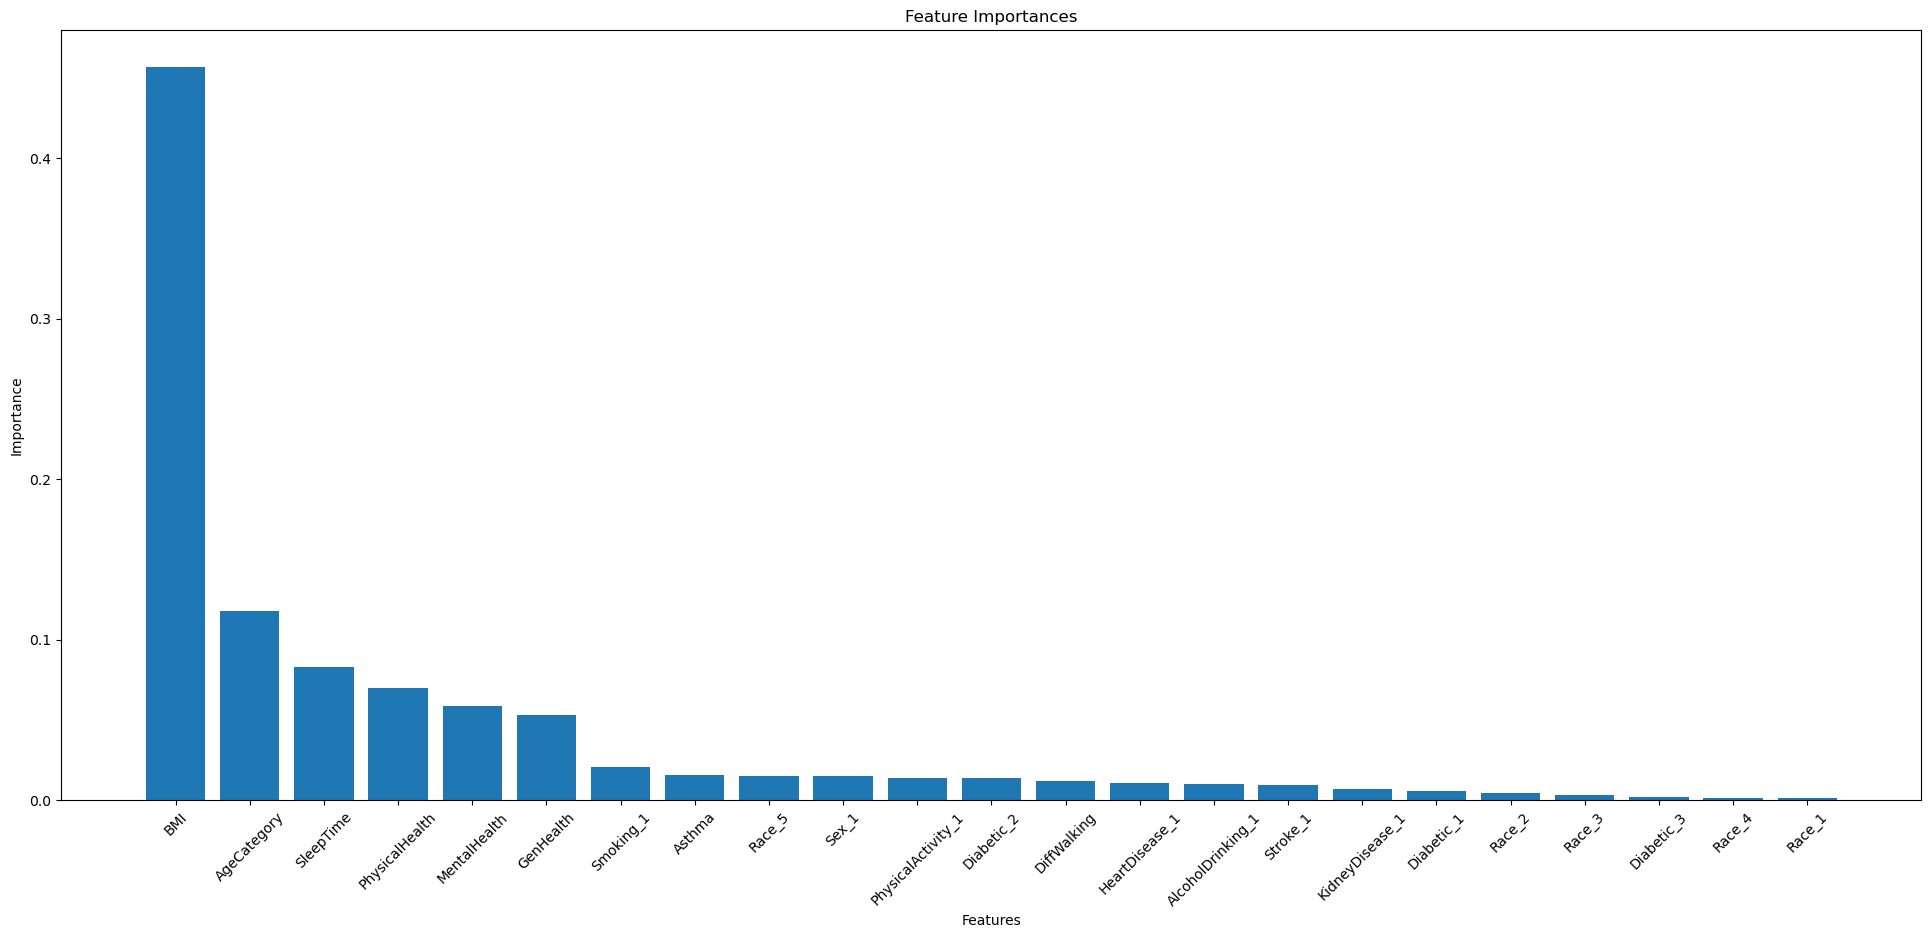

In [14]:
categorical_features = ['Smoking', 'AlcoholDrinking','Sex', 'Race', 'PhysicalActivity', 'KidneyDisease','Diabetic','Stroke','HeartDisease']
df[categorical_features] = df[categorical_features].astype('category')

# Separate the features and target variable
X = df.drop('SkinCancer', axis=1)
y = df['SkinCancer']

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Fit the model
rf.fit(X_encoded, y)

# Retrieve the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# Create a bar plot to visualize the feature importances
plt.figure(figsize=(24, 10))
plt.bar(X_encoded.columns[sorted_indices], importances[sorted_indices])
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

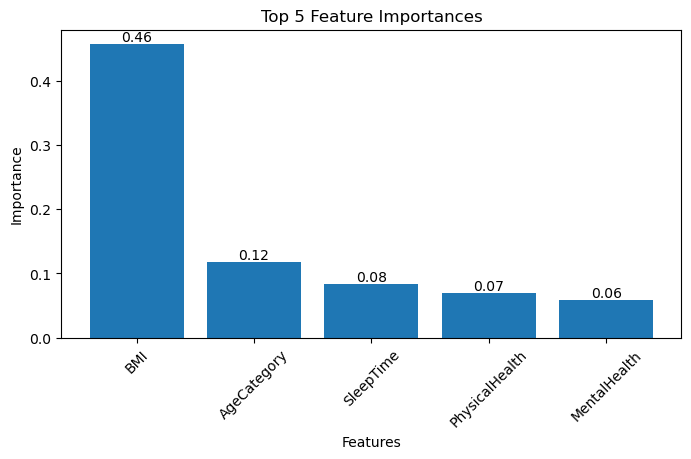

In [15]:
# Create a bar plot to visualize the top 10 feature importances
plt.figure(figsize=(8, 4))
plt.bar(X_encoded.columns[sorted_indices[:5]], importances[sorted_indices[:5]])
plt.title('Top 5 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')

# Add importance values as annotations
for i, v in enumerate(importances[sorted_indices[:5]]):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

# Model Development

In [16]:
df = df.drop('Diabetic', axis=1)
df = df.drop('HeartDisease', axis=1)
df = df.drop('Stroke', axis=1)

In [17]:
X = df.drop('SkinCancer', axis=1)
y = df['SkinCancer']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Model without Feature Selection
# Create and train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", dt_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.8318370883882149
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91     52028
           1       0.17      0.19      0.18      5672

    accuracy                           0.83     57700
   macro avg       0.54      0.55      0.54     57700
weighted avg       0.84      0.83      0.84     57700



In [20]:
# without feature selection
# Create and train the random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8757019064124784
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     52028
           1       0.18      0.08      0.11      5672

    accuracy                           0.88     57700
   macro avg       0.54      0.52      0.52     57700
weighted avg       0.83      0.88      0.85     57700



In [21]:
# without feature 
# Create and train the logistic regression model
lg_model = LogisticRegression(max_iter=1000)
lg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lg_model.predict(X_test)

# Evaluate the model
lg_accuracy = accuracy_score(y_test, y_pred)
print("Logisitc Regression Accuracy:", lg_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Logisitc Regression Accuracy: 0.9017157712305026
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     52028
           1       0.67      0.00      0.00      5672

    accuracy                           0.90     57700
   macro avg       0.78      0.50      0.47     57700
weighted avg       0.88      0.90      0.86     57700



## Oversampling

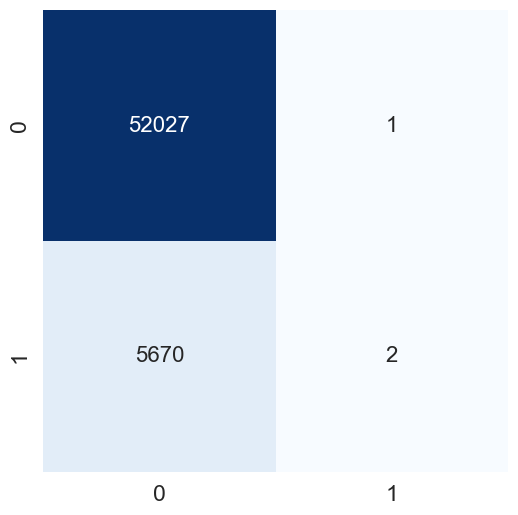

In [22]:
# seeing for class imbalance and overfitting
def conf_matrix(y_test, pred_test):    

    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))

    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

#Ploting the confusion matrix
conf_matrix(y_test, y_pred)

<AxesSubplot:ylabel='SkinCancer'>

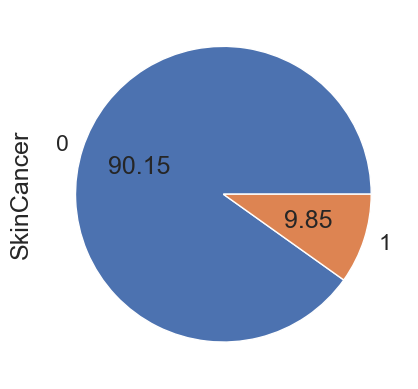

In [23]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

1    260071
0    260071
Name: SkinCancer, dtype: int64

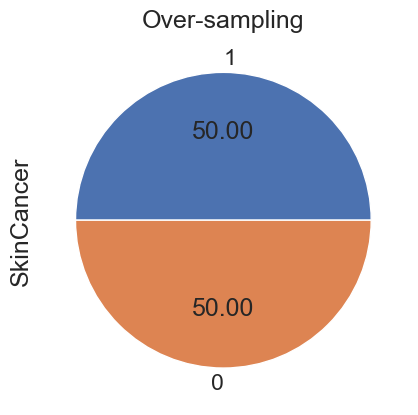

In [24]:
ros = RandomOverSampler(sampling_strategy="not majority") 
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

y_res.value_counts()

In [25]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [26]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000)

In [27]:
y_pred_res = lr_model.predict(X_test_res)

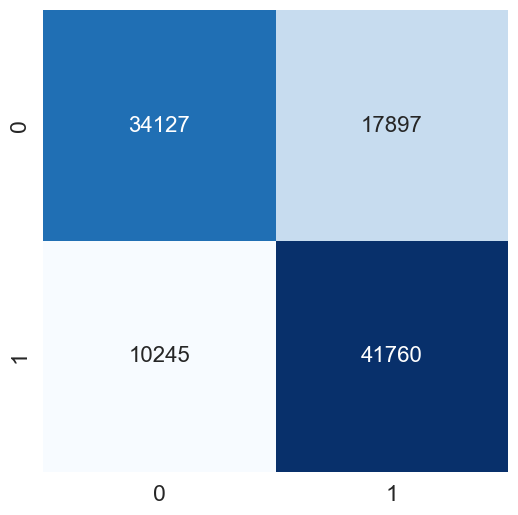

In [28]:
def conf_matrix(y_test_res, pred_test_res):    

    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test_res, pred_test_res)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))

    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

#Ploting the confusion matrix
conf_matrix(y_test_res, y_pred_res)

## Models

In [29]:
print(y_train_res.count())
print(y_test_res.count())

416113
104029


In [30]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=10)))
models.append(('GB', GradientBoostingClassifier()))

In [31]:
score_list = []

for name, model in models:
    print(name)
    model.fit(X_train_res, y_train_res) # all training happens here
    y_pred_res = model.predict(X_test_res)
    score = accuracy_score(y_test_res, y_pred_res)
    score_list.append(score)
    print(score)

KNN


/Users/char/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8642397792923128
LR
0.7295273433369541
DT
0.9393053859981352
GNB
0.7204817887319882
RF
0.9534841246190966
GB
0.7329398533101347


In [32]:
names = []
scores = []
for name, model in models:
    model.fit(X_train_res, y_train_res)
    y_pred_res = model.predict(X_test_res)
    scores.append(accuracy_score(y_test_res, y_pred_res))
    names.append(name)
    
models_comparison = pd.DataFrame({'Name': names, 'Score': scores})
models_comparison

/Users/char/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Name,Score
0,KNN,0.864240
1,LR,0.729527
2,DT,0.939450
3,GNB,0.720482
4,RF,0.952879
5,GB,0.732940


In [33]:
models_comparison.sort_values(by='Score', ascending=False)

,Name,Score
4,RF,0.952879
2,DT,0.939450
0,KNN,0.864240
5,GB,0.732940
1,LR,0.729527
3,GNB,0.720482


# Fine Tuning of Models

## Random Forest

In [34]:
# Create and train the random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_res = rf_model.predict(X_test_res)

# Evaluate the model
rf_accuracy = accuracy_score(y_test_res, y_pred_res)
print("Random Forest Accuracy:", rf_accuracy)
print("Classification Report:\n", classification_report(y_test_res, y_pred_res))

Random Forest Accuracy: 0.9555893068279038
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     52024
           1       0.92      1.00      0.96     52005

    accuracy                           0.96    104029
   macro avg       0.96      0.96      0.96    104029
weighted avg       0.96      0.96      0.96    104029



### "Is this the best Model?"
Random Forest is not the best Model as the Recall and Precision is 1. This shows that it is too accurate and overfitted. Therefore, cannot be the Best Model.

## Decision Tree

In [35]:
# Create and train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_res = dt_model.predict(X_test_res)

# Evaluate the model
dt_accuracy = accuracy_score(y_test_res, y_pred_res)
print("Decision Tree Accuracy:", dt_accuracy)
print("Classification Report:\n", classification_report(y_test_res, y_pred_res))

Decision Tree Accuracy: 0.939314998702285
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94     52024
           1       0.89      1.00      0.94     52005

    accuracy                           0.94    104029
   macro avg       0.95      0.94      0.94    104029
weighted avg       0.95      0.94      0.94    104029



### "Is this the best Model?"
Decision Tree is not the best Model as the Recall and Precision is 1. This shows that it is too accurate and overfitted. Therefore, cannot be the Best Model.

## KNN Model

In [36]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_res, y_train_res)

KNeighborsClassifier()

In [37]:
y_pred_res = knn_model.predict(X_test_res)

/Users/char/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
knn_accuracy = accuracy_score(y_test_res, y_pred_res)
print("KNN Accuracy:", knn_accuracy)
print("Classification Report:\n", classification_report(y_test_res, y_pred_res))

KNN Accuracy: 0.8642397792923128
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.74      0.84     52024
           1       0.79      0.99      0.88     52005

    accuracy                           0.86    104029
   macro avg       0.89      0.86      0.86    104029
weighted avg       0.89      0.86      0.86    104029



### "Is this the best Model?"
KNearestNeighbor is not the best Model as the Recall and Precision is 0.99. This shows that it is too accurate and overfitted. Therefore, cannot be the Best Model.

## Gradient Boosting

In [50]:
# Create and train the gb model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_res = gb_model.predict(X_test_res)

# Evaluate the model
gb_accuracy = accuracy_score(y_test_res, y_pred_res)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Classification Report:\n", classification_report(y_test_res, y_pred_res))

Gradient Boosting Accuracy: 0.7329398533101347
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.62      0.70     52024
           1       0.69      0.84      0.76     52005

    accuracy                           0.73    104029
   macro avg       0.75      0.73      0.73    104029
weighted avg       0.75      0.73      0.73    104029



In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create and fit the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_distributions=param_grid,
    n_iter=10,  # Number of random parameter settings to sample
    cv=3,
    n_jobs=-1
)

# Fit the model using a smaller subset of data for faster tuning
random_search.fit(X_train_res[:10000], y_train_res[:10000])

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

/var/folders/56/6ngfmf2j3cl0tgpthcx0lmsm0000gn/T/ipykernel_79688/3551608939.py:23: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  random_search.fit(X_train_res[:10000], y_train_res[:10000])


Best Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.2}
Best Score: 0.734400854602557


In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create and fit the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_distributions=param_grid,
    n_iter=10,  # Number of random parameter settings to sample
    cv=3,
    n_jobs=-1
)

# Use .iloc to slice the Series
random_search.fit(X_train_res.iloc[:10000], y_train_res.iloc[:10000])

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.1}
Best Score: 0.7372009246515533


In [59]:
# Create and train the gb model with fine tune
gb_model = GradientBoostingClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=3, learning_rate=0.1)
gb_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_res = gb_model.predict(X_test_res)

# Evaluate the model
gb_accuracy = accuracy_score(y_test_res, y_pred_res)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Classification Report:\n", classification_report(y_test_res, y_pred_res))

Gradient Boosting Accuracy: 0.7329494660142845
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.62      0.70     52024
           1       0.69      0.84      0.76     52005

    accuracy                           0.73    104029
   macro avg       0.75      0.73      0.73    104029
weighted avg       0.75      0.73      0.73    104029



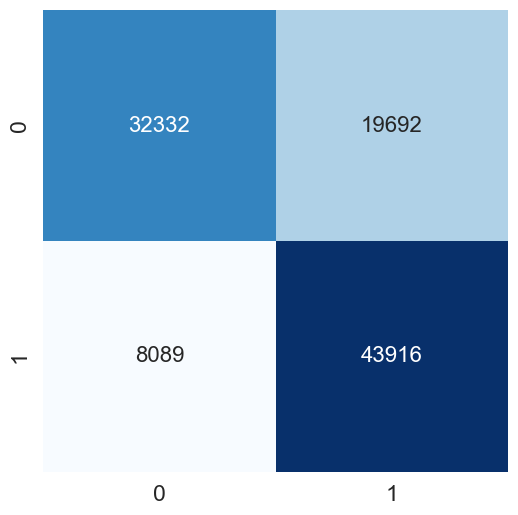

In [60]:
def conf_matrix(y_test_res, pred_test_res):    

    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test_res, pred_test_res)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))

    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

#Ploting the confusion matrix
conf_matrix(y_test_res, y_pred_res)

### "Is this the best Model?"
Gradient Boosting is the best Model as the Recall and Precision is high enough but not too overfitted. Therefore, Gradient Boosting is the Best Model with a high enough of accuracy, Recall and Precision.

## Logistic Regression

In [55]:
# without feature 
# Create and train the logistic regression model
lg_model = LogisticRegression(max_iter=1000)
lg_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_res = lg_model.predict(X_test_res)

# Evaluate the model
lg_accuracy = accuracy_score(y_test_res, y_pred_res)
print("Logisitc Regression Accuracy:", lg_accuracy)
print("Classification Report:\n", classification_report(y_test_res, y_pred_res))

Logisitc Regression Accuracy: 0.7294792798162051
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.66      0.71     52024
           1       0.70      0.80      0.75     52005

    accuracy                           0.73    104029
   macro avg       0.73      0.73      0.73    104029
weighted avg       0.73      0.73      0.73    104029



In [56]:
# Perform Recursive Feature Elimination with Cross-Validation (RFECV)
rfecv = RFECV(estimator=LogisticRegression(max_iter=1000), step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_res, y_train_res)

# Get the selected features
selected_features = X_train_res.columns[rfecv.support_].tolist()

# Update the dataset with the selected features
X_train_selected = X_train_res[selected_features]
X_test_selected = X_test_res[selected_features]

print("Selected Features:", selected_features)

Selected Features: ['BMI', 'Smoking', 'AlcoholDrinking', 'PhysicalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease']


In [57]:
# Create and train the final logistic regression model with the selected features
final_logreg_model = LogisticRegression(max_iter=1000)
final_logreg_model.fit(X_train_selected, y_train_res)

# Make predictions on the test set using the model with selected features
y_pred_final = final_logreg_model.predict(X_test_selected)

# Evaluate the model with selected features
logreg_accuracy_final = accuracy_score(y_test_res, y_pred_final)
print("Final Logistic Regression Accuracy:", logreg_accuracy_final)
print("Classification Report for Final Model:\n", classification_report(y_test_res, y_pred_final))

Final Logistic Regression Accuracy: 0.7296715338992011
Classification Report for Final Model:
               precision    recall  f1-score   support

           0       0.77      0.66      0.71     52024
           1       0.70      0.80      0.75     52005

    accuracy                           0.73    104029
   macro avg       0.73      0.73      0.73    104029
weighted avg       0.73      0.73      0.73    104029



### "Is this the best Model?"
Logistic Regression is not the best Model as the Recall, Precision and Accuracy is lower than Gradient Boosting even after fine-tuning. Therefore, Logistic Regression cannot be the Best Model.

## Gaussian NB

In [58]:
best_gnb_model = GaussianNB()

# Perform univariate feature selection with SelectKBest and chi-squared test
k_best = SelectKBest(score_func=chi2, k=5)  # Select top 5 features
X_train_selected = k_best.fit_transform(X_train_res, y_train_res)
X_test_selected = k_best.transform(X_test_res)

# Train the GaussianNB model with selected features
best_gnb_model.fit(X_train_selected, y_train_res)

# Make predictions on the test set
y_pred = best_gnb_model.predict(X_test_selected)

# Evaluate the model with selected features
GNB_accuracy_final = accuracy_score(y_test_res, y_pred_res)
print("Final GaussianNB Accuracy:", GNB_accuracy_final)

Final GaussianNB Accuracy: 0.7294792798162051


### "Is this the best Model?"
GaussianNB is not the best Model as the Accuracy, Recall, and Precision is lower than both Logistic Regression and Gradient Boosting. Therefore, GaussianNB is not the Best Model as its score is not higher than the other models.